
<center><a href="https://ccnb.ca/programmes/internet-des-objets/"><img src="https://upload.wikimedia.org/wikipedia/fr/0/07/College_communautaire_du_NouveauBrunswick_logo.svg" width=200/></a>
<a href="https://colab.research.google.com/"><img src="https://upload.wikimedia.org/wikipedia/commons/d/d0/Google_Colaboratory_SVG_Logo.svg" width=350/></a></center>


---


#**Laboratoire 5** : **Collecte**, **analyse exploratoire** de ***données*** et **modélisation**
 


# **SmartEnvironment** and **SmartAgriculture** projects : **M**achine **L**earning **Project** with IDE Arduino | **2023-2028**

## Prévision météorologique : Préparation pour le développement d'une application de prédiction de la pluie (Station Météorologique).

 * **Capteur DHT11 - Arduino**
 * **Capteur de luminosité - Arduino**
 * **Capteur de pluie - Arduino**

 * **µC : ESP32/ESP8266 - Arduino**



---


#**Préparé par :**

**C**hristophe **Honvo** - M. Ing, enseignant Ido/IoT, et **D**uvalier **Tsagmo**, spécialiste IdO/IoT. 



---



#**I**. **Mise en situation :**

###**Notre solution d'agriculture connectée, est une station météorologique pour les professionnels de l’agriculture. Elle mesure avec précision l’humidité, la température, l'ensoleillement et la pluie sur vos parcelles.**

Elle fournit les **informations** c'est-à-dire les ***données*** sur l'**humidité** (Humidity), et la **température** (Temperature) de l’**air**, l'**ensoleillement** (SUN) et sur **pluviométrie** (Rain).

Notre station mesure toutes ces données capteurs en « temps » avec précision, ainsi nous avons sur idée sur l’évolution de tous ces paramètres agro-météorologiques que nous pouvons mettre à disposition de l'agriculteur,  clés en main, pour permettre une prise de décision (notre cas ici une  ***modélisation par régression linéaire*** qui nous permet de **prédire** et **estimer** la **probabilité de pluie** par rapport à l'utilisation de son système d'arrosage) lors de ses activités. 

Grâce à ces données, vous avez toujours une longueur d’avance sur la météo. Et vous prenez les meilleures décisions pour vos cultures.

Accédez en temps réel à des données fiables et ultra-locales grâce à notre station météorologique pour les professionnels du monde agricole la plus complète du marché.


#####Pour un vecteur de ces **trois** ***paramètres***, cette fonction est donnée par la ***formule suivante***:

\begin{align}
       Probability (Rain) = \mathbf{a} \cdot \mathbf{b} &= \sum_{i=1}^n a_i b_i \\
        &= a \cdot Humidity + b \cdot Temperature + c \cdot SunLight + d.
    \end{align}


Où ***a***, ***b***, et ***c***, sont des coefficients et  ***d*** la valeur correspondante pour les 3 paramètres sont égaux à ***zéro***.



---


#**II**. **Architecture globale du système** (Schéma **synoptique**). 

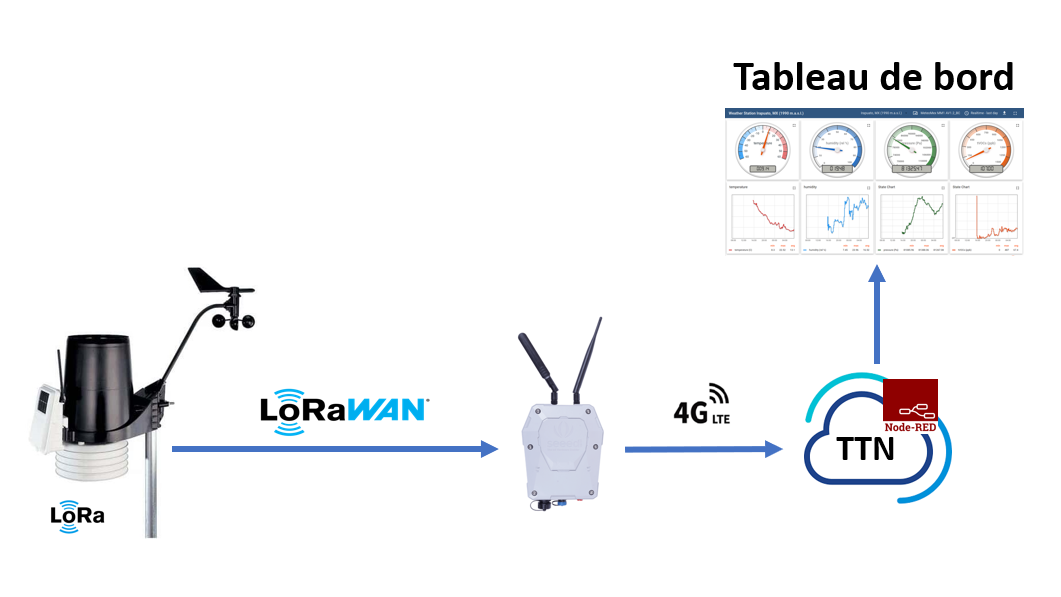



---


#**III**. **A**nalyse **e**xploratoire des **d**onnées (**AED**) :

#Dans cette partie du laboratoire, nous allons faire l'**analyse exploratoire** de ***données*** **collectées** sur la **station météorologique**.

###Pour ce fait, vous ***devez*** **lire**, tous les paragraphes et **exécuter** de façon chronologique les cellules qui vous permettra de mettre en place à la fin l'algorithme (le modèle) que nous allons implémeter dans les différents modèles d'objet IdO/IoT carte avec ***microcontrôleur***, comme l'**ESP32**, l'**ESP8266**, ou le **MKR1000**.

###**Installation** des ***librairies***

**Mettre à jour** les ***librairies***

In [1]:
# Identifier le répertoire courant du projet
import os
print(os.getcwd())

c:\Users\21356\Downloads


In [1]:
#Installer ou mettre à jour pandas : la librairie logicielle open-source Pandas est spécifiquement conçue pour la manipulation et l'analyse de données en 
#langage Python. Elle est à la fois performante, flexible et simple d'utilisation. Grâce à Pandas, le langage Python permet enfin de charger, 
#d'aligner, de manipuler ou encore de fusionner des données.
!pip install pandas

#Installer ou mettre à jour numpy : la librairie nommée NumPy est une bibliothèque pour langage de programmation Python, destinée à manipuler des matrices 
#ou tableaux multidimensionnels ainsi que des fonctions mathématiques opérant sur ces tableaux.
!pip uninstall -y numpy
!pip uninstall -y setuptools
!pip install setuptools
!pip install numpy

# Installer la librairie : matplotlib, pour
!pip install matplotlib

# Installer ou mettre à jour sklearn : la librairie
#!pip install sklearn --upgrade
!pip uninstall sklearn
!pip install sklearn

# Installer ou mettre à jour seaborn : la librairie seaborn est une bibliothèque qui offre la possibilité de résumer et de visualiser des données. 
# Elle permet de créer de jolis graphiques statistiques en Python. Cette bibliothèque apporte des fonctionnalités inédites
# qui favorisent l'exploration et la compréhension des données.
!pip uninstall seaborn
!pip install seaborn


Found existing installation: numpy 1.24.2
Uninstalling numpy-1.24.2:
  Successfully uninstalled numpy-1.24.2
Found existing installation: setuptools 67.4.0
Uninstalling setuptools-67.4.0:
  Successfully uninstalled setuptools-67.4.0
  Using cached setuptools-67.4.0-py3-none-any.whl (1.1 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.11.0 requires numpy>=1.20, which is not installed.
tensorboard 2.11.2 requires numpy>=1.12.0, which is not installed.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, which is not installed.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.10.1 requires ruamel-yaml, which is not installed.


  Using cached numpy-1.24.2-cp39-cp39-win_amd64.whl (14.9 MB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
scipy 1.7.1 requires numpy<1.23.0,>=1.16.5, but you have numpy 1.24.2 which is incompatible.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.24.2 which is incompatible.


^C
^C
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.2
    Uninstalling numpy-1.24.2:
      Successfully uninstalled numpy-1.24.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.4 which is incompatible.


###**Importations** des ***librairies***

In [7]:
# Importer la librairie : sys, pour masquer les warnings intempestibles
import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# Importer la librairie : pandas. 
import pandas as pd
from pandas.plotting import scatter_matrix
#print(pd.__version__)

# Importer la librairie : numpy.
import numpy as np
print(np.__file__)

# Importer la librairie : seaborn.
import seaborn as sns
print(sns.__version__)

# Importer la librairie : matplotlib.
import matplotlib.pyplot as plt

c:\Users\21356\anaconda3\lib\site-packages\numpy\__init__.py
0.11.2


In [8]:
# Charger le fichier de données rain.csv, (entête : Humidity, Temperature, Sun, Rain), mis à votre disposition, 
# pour permettre d'abord l'analyse exploratoire de données, ensuite le traitement 
# et plus tard la modélisation.
meteoDataSet = pd.read_csv("rain.csv")

In [9]:
# Afficher les entêtes et les 5 premières lignes des enregistrements
meteoDataSet.head()

,Humidity,Temperature,Sun,Rain
0,60,19,890,80
1,70,18,840,92
2,40,25,1000,40
3,62,21,923,75
4,69,20,916,77


In [10]:
# Afficher les dernières lignes des enregistrements
meteoDataSet.tail()

,Humidity,Temperature,Sun,Rain
22,97,15,800,97
23,84,13,1200,5
24,88,15,1100,7
25,94,13,830,90
26,92,15,880,87


In [11]:
# Afficher les descriptions sur les données
meteoDataSet.describe()

,Humidity,Temperature,Sun,Rain
count,27.000000,27.000000,27.000000,27.000000
mean,73.000000,20.814815,941.555556,63.481481
std,17.937927,4.875662,126.366784,32.933932
min,40.000000,13.000000,800.000000,2.000000
25%,61.000000,18.000000,853.500000,37.500000
50%,73.000000,20.000000,900.000000,77.000000
75%,90.000000,25.000000,1000.000000,91.000000
max,97.000000,30.000000,1200.000000,99.000000


In [12]:
# Afficher les informations sur les données
meteoDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Humidity     27 non-null     int64
 1   Temperature  27 non-null     int64
 2   Sun          27 non-null     int64
 3   Rain         27 non-null     int64
dtypes: int64(4)
memory usage: 992.0 bytes


In [13]:
# Différents types de données
meteoDataSet.dtypes

Humidity       int64
Temperature    int64
Sun            int64
Rain           int64
dtype: object

###**Qualité** des ***données***

***Données*** **manquantes**

In [14]:
# Recherche de données manquantes
print("\n----------------------------------------------------------------------------------------------------------------------\n")
print("Nombre de valeurs manquantes pour l'attribut - Humidity : ",meteoDataSet['Humidity'].isnull().sum())
print("Nombre de valeurs manquantes pour l'attribut - Temperature : ",meteoDataSet['Temperature'].isnull().sum())
print("Nombre de valeurs manquantes pour l'attribut - Sun : ",meteoDataSet['Sun'].isnull().sum())
print("Nombre de valeurs manquantes pour l'attribut - Rain : ",meteoDataSet['Rain'].isnull().sum())
print("\n-----------------------------------------------------------------------------------------------------------------------")


----------------------------------------------------------------------------------------------------------------------

Nombre de valeurs manquantes pour l'attribut - Humidity :  0
Nombre de valeurs manquantes pour l'attribut - Temperature :  0
Nombre de valeurs manquantes pour l'attribut - Sun :  0
Nombre de valeurs manquantes pour l'attribut - Rain :  0

-----------------------------------------------------------------------------------------------------------------------


***Recherche des attributs*** **numériques**

In [10]:
# Recherche des attributs numériques
ListesAttributsNumeriques = meteoDataSet.select_dtypes(include=['int64'])
ListesAttributsNumeriques

,Humidity,Temperature,Sun,Rain
0,60,19,890,80
1,70,18,840,92
2,40,25,1000,40
3,62,21,923,75
4,69,20,916,77
5,73,20,900,83
6,55,26,1100,30
7,90,19,867,92
8,95,15,800,99
9,40,27,1200,25


***Recherche des attributs*** **catégoriels**

In [11]:
# Recherche des attributs catégoriels (catégoriques)
ListesAttributsCategoriques = meteoDataSet.select_dtypes(include=['object'])
ListesAttributsCategoriques

""
0
1
2
3
4
5
6
7
8
9


***Conclusion :*** **Pas** de ***données*** **manquantes**

À ce stade, nous voyons qu'il n'a pas de donner manquantes, donc, nous pouvons **représenter** ***graphiquement*** l'ensemble de données afin de les **visualiser** et de prendre des ***décisions*** ultérieurement.

**Visualisation** de ***données*** : 

La ***visualisation des attributs*** est peut-être la partie la plus importante et la plus intéressante de l’**A**nalyse **E**xploratoire des **D**onnées (**AED**). 

Une information est mieux comprise si nous utilisons une ***image*** ou une ***visualisation***. 

Cependant, nous devons toujours garder à l'esprit si la visualisation est **appropriée** pour le ***type de données*** en question. 

Nous ne devrions pas simplement essayer toutes les visualisations que nous connaissons et dire que nous en avons terminé avec L’AED.

Nous devrions plutôt **réaliser** des ***visualisations spécifiques*** et **veiller à bien comprendre** ce que la visualisation nous dit.

Commençons par **tracer** une ***simple visualisation*** pour chacun des attributs numériques.

##**Visualisation simple** des courbes de variations des paramètres de la ***station météorologique***.

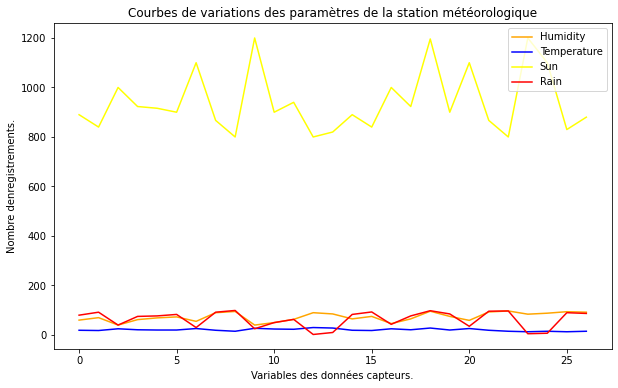

In [7]:
plt.figure(figsize = (10,6))
plt.title(f'Courbes de variations des paramètres de la station météorologique')

# Ici nous définissons chaque paramètre à partir du jeu des données disponibles
humidity = meteoDataSet["Humidity"]
temperature = meteoDataSet["Temperature"]
sun = meteoDataSet["Sun"]
rain = meteoDataSet["Rain"]

# Ici nous traçons les différentes courbes 
plotHumidity = plt.plot(humidity,color="orange",label="Humidity")
plotTemperature = plt.plot(temperature,color="blue",label="Temperature")
plotSun = plt.plot(sun,color="yellow",label="Sun")
plotRain = plt.plot(rain,color="red",label="Rain")


# Ici nous définissons les labels sur les axes
plt.xlabel('Variables des données capteurs.')
plt.ylabel('Nombre d''enregistrements.')

# Ici positionnement des légendes 
# (loc=1 : en haut à droite; loc=2 : en haut à gauche)
# (loc=3 : en bas à droite; loc=4 : en bas à gauche) 
plt.legend(loc = 1)
print("\n")
plt.show()
print("\n")

###**Visualisation en 3D** des courbes de variations des paramètres de la ***station météorologique***.

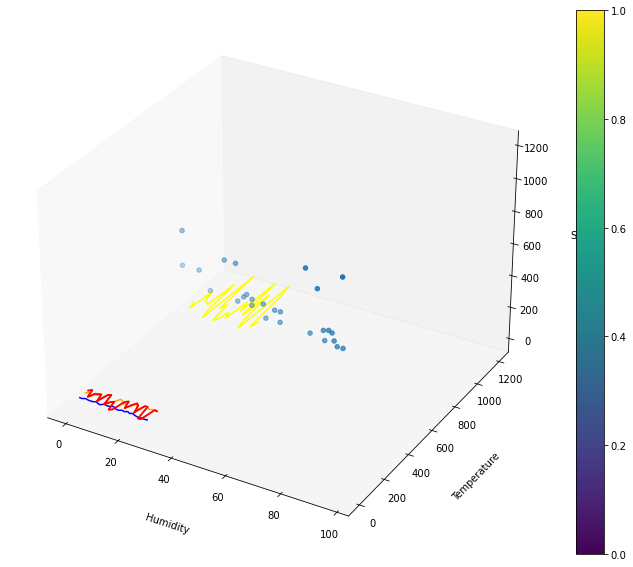

In [8]:
fig = plt.figure(figsize = (12,10))
ax = plt.axes(projection='3d')

x = meteoDataSet["Humidity"].plot(kind="line",color="orange")
y = meteoDataSet["Temperature"].plot(kind="line",color="blue")
z = meteoDataSet["Sun"].plot(kind="line",color="yellow")
Rain = meteoDataSet["Rain"].plot(kind="line",color="red")

X, Y, Z = np.meshgrid(meteoDataSet["Humidity"], meteoDataSet["Temperature"], meteoDataSet["Sun"])
Rain = meteoDataSet["Rain"].plot(kind="line",color="red")

# Set axes label
ax.set_xlabel('Humidity', labelpad=20)
ax.set_ylabel('Temperature', labelpad=20)
ax.set_zlabel('Sun', labelpad=20)

sp=ax.scatter(meteoDataSet["Humidity"], meteoDataSet["Temperature"], meteoDataSet["Sun"])

fig.colorbar(sp)

###**Tracé** des **histogrammes** des ***données***

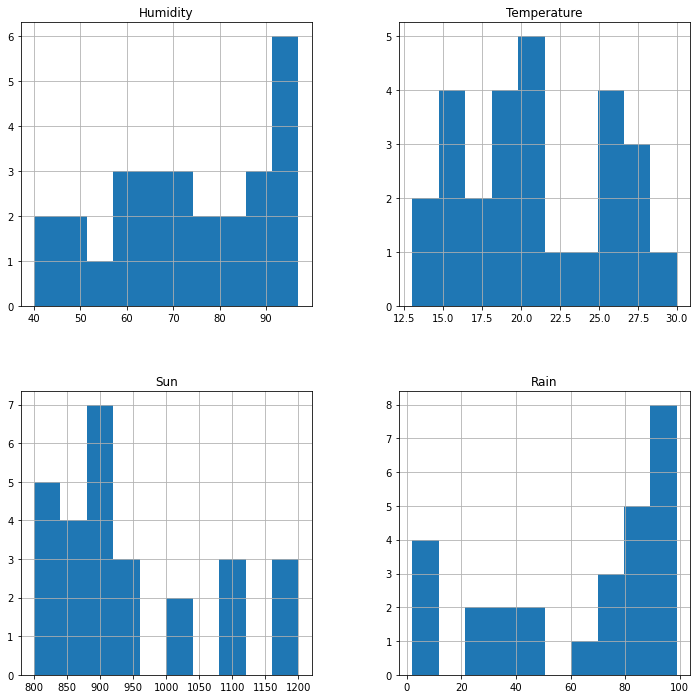

In [9]:
# Tracé des histogrammes des données
# dataset.hist()
# plt.show()
meteoDataSet.hist(figsize=(12,12))
plt.show()

###**Tracé** de la **matrice** de ***nuages ​​de points***

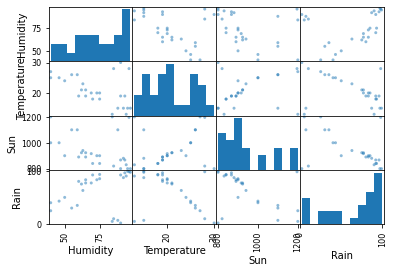

In [10]:
# scatter plot matrix
scatter_matrix(meteoDataSet)
plt.show()



---


#**IV**. **Recherche** de **corrélation** entre les ***différents*** **paramètres** des ***données*** : 

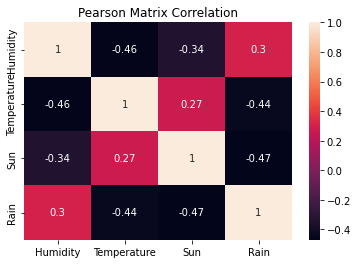

In [11]:
# Correlation 
# Calculate the correlation matrix, and use the strength of these modules
corr = meteoDataSet.corr()
sns.heatmap(corr, annot=True)
plt.title("Pearson Matrix Correlation")
plt.show()

#**V**. **Mise en place** de la ***modélisation*** 

Ici nous allons faire une **regression linéaire**, ce qui consiste à trouver les ***coefficients*** : ***a***, ***b***, ***c***, et ***d*** de la formule définie précédemment : 

\begin{align}
       Probability (Rain) = \mathbf{a} \cdot \mathbf{b} &= \sum_{i=1}^n a_i b_i \\
        &= a \cdot Humidity + b \cdot Temperature + c \cdot SunLight + d.
    \end{align}


In [17]:
# Installer ou mettre à jour : la librairie sklearn
#!pip install sklearn --upgrade
!pip uninstall sklearn
!pip install sklearn --upgrade

^C


In [2]:
# Importer la librairie : sklearn, la construction des modèles d'apprentissage automatique
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [3]:
# Nous faisons appel à la fonction de régression linéaire (LinearRegression()) :
Reg=linear_model.LinearRegression()

In [15]:
# Ici, nous faisons appel à la fonction 'fit', un modèle de régression linéaire est créé et entraîné 
# (dans sklearn, le train est égal à l'ajustement).
Reg.fit(meteoDataSet[["Humidity","Temperature","Sun"]], meteoDataSet.Rain)

LinearRegression()

Ici nous calculons les les ***coefficients*** : ***a***, ***b***, et ***c***, de la fonction **regression linéaire**, ce qui consiste à faire appel à la fonction ***coef_*** comme indiqué ci-dessous :

In [16]:
# Calcul des coefficients a, b, c, de la fonction de régression linéaire (LinearRegression()) :
Reg.coef_

array([ 0.03743225, -2.21389335, -0.09773871])

Nous pouvons alors distinguer les différents coefficients comme suit :

In [17]:
a = Reg.coef_[0]
print ("La valeur du coefficient a vaut :", a)

b = Reg.coef_[1]
print ("La valeur du coefficient b vaut :", b)

c = Reg.coef_[2]
print ("La valeur du coefficient c vaut :", c)

La valeur du coefficient a vaut : 0.03743225094059096
La valeur du coefficient b vaut : -2.213893347040987
La valeur du coefficient c vaut : -0.09773871130019073


Il nous reste à calculer ***d*** utilisée pour la **regression linéaire**, ce qui consiste à faire appel à la fonction ***intercept_*** comme indiqué ci-dessous :

In [18]:
# Calcul du coefficient d, de la fonction de régression linéaire (LinearRegression()) :
d = Reg.intercept_
print ("La valeur du coefficient d vaut :", d)

La valeur du coefficient d vaut : 198.85713381876218


Nous allons calculer la probabilité ((prédiction)) qu'il pleuve, pour des valeurs d'**Humidité** (***94%***), de **Température** (***15°C***), d'**ensoleillement** (***850 Lux***), en utilisant la fonction ***predict***.

In [19]:
ProbabilityRainReg = Reg.predict([[94,15,850]])
print("La probabilité qu'il pleuve est de : ",ProbabilityRainReg)

La probabilité qu'il pleuve est de :  [86.0894606]


Comparons notre prédiction avec le calcul par l'utilisation de la formule trouvée grâce aux calculs des coefficients:

In [20]:
Humidity=25
Temperature=35
Sun =800

ProbabilityRainCalcul = a*Humidity + b*Temperature + c*Sun + d

print ("Pour une humidité de (",Humidity,"%), une température est de (",Temperature,"°C) et un ensoleillement de (",Sun,"Lux), la probabilité pour qu'il pleuve est de :",ProbabilityRainCalcul,"%")

Pour une humidité de ( 25 %), une température est de ( 35 °C) et un ensoleillement de ( 800 Lux), la probabilité pour qu'il pleuve est de : 44.11570390568983 %




---


#**IV**. **Conclusion :**

###Nous remarquons que la ***valeur calculée*** **correspond** bien à la ***valeur à prédire*** car elles sont très très proches.




---
#**V**. **Programmation** du **microcontrôleur** à partir de la ***formule validée*** par la ***modélisation***.

#Voici le code complet ***IDE Arduino*** à implémenter dans votre carte Microcontrôleur (soit un arduino MKR1000, un **ESP32/ESP8266**) :

```
#include <Adafruit_Sensor.h>
#include "DHT.h"
#define DHTPIN 2              // Pin Digital de connexion du capteur DHT 11
#define DHTTYPE DHT11         // DHT 11
#include <LiquidCrystal.h>
#include<Wire.h>
LiquidCrystal lcd(13, 12, 11, 10, 9, 8);
DHT dht(DHTPIN, DHTTYPE);
int light= A0; 


void setup() 
{
  Serial.begin(9600);
  dht.begin();
  delay(10);
  lcd.begin(20, 4);
  lcd.setCursor(0,0);
  lcd.print("Station Météorologique");
  lcd.setCursor(0,1);
  lcd.print("Machine learning");
  lcd.setCursor(0,2);
  lcd.print("au CCNB Campus de Bathurst");
  lcd.setCursor(0,3);
  lcd.print("!!!...");
  delay(2000);
  lcd.clear();
  Serial.println("REBOOT");
}
 
void loop()
{
  double k=analogRead(A0); // LDR reading
  double h = dht.readHumidity();//Humidity
  double t = dht.readTemperature();//Temprature
  if (isnan(h) || isnan(t) ) 
  {       
    Serial.println(F("Pas de lecture du capteur DHT!"));
  }
  //Formule trouvée par modélisation
  double ProbablityRain=0.03743225*h - 2.21389335*t - 0.09773871*k +198.85713381876218;
  
  //If-clauses - Alertes sur les LEDs Blue, Orange, Red 

  lcd.setCursor(0,0);
  lcd.print("The Probablity of");
  lcd.setCursor(0,1);
  lcd.print("Raining in % is ");
  lcd.setCursor(0,2);
  lcd.print(ProbablityRain);
      
}
```

# **Démonstration** : **Synthèse** et **validation** des ***manipulations*** par l'étudiant et l'enseignant:

Il est **important** de ***comprendre*** que toutes les étapes du Laboratoire sont celles d'une approche globale d'implémentation des algorithmes d'intelligence artificielle.

*   Dans votre environnement de développement IDE Arduino, **créer** un skectch nonmmé (**station.ino**) et **copier-et-coller** le programme **C/C++** ci-dessus.

*   **Complier** et **téléverser** le programme dans votre **microcontrôleur**.

*   **Valider** le bon ***fonctionnement*** de votre ***objet IdO/IoT*** par l'enseignant. 


#**Références :**

https://weather.gc.ca/city/pages/nb-28_metric_e.html